In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from simple_hierarchical_topic_model import SimpleHierarchicalTopicModel, load_vocab, loadmat

In [3]:
np.random.seed(1)

In [4]:
print("Loading data...")
data = loadmat("/Users/aleverentz/Code/anchor-word-recovery/M_nips.full_docs.mat.trunc.mat")["M"]
#data = loadmat("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts.mat")["M"]
print("Vocab size: {}".format(data.shape[0]))
print("Num documents: {}".format(data.shape[1]))
print("Nonzero entries: {}".format(data.nnz))
print("Loading vocab...")
vocab = load_vocab("/Users/aleverentz/Code/anchor-word-recovery/vocab.nips.txt.trunc")
#vocab = load_vocab("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts_vocab.txt")
print("Vocab size = {}".format(len(vocab)))
assert data.shape[0] == len(vocab)

Loading data...
Vocab size: 2940
Num documents: 1500
Nonzero entries: 585933
Loading vocab...
Vocab size = 2940


In [5]:
import os
import sys
sys.path.append(os.path.abspath(".."))
import text_utils

In [6]:
%%time

data, vocab = text_utils.xml_to_sparse_term_doc(
    filename = "/Users/aleverentz/Downloads/ap/ap_mod_xml.txt",
    within = ["toplevel"],
    eachdoc = ["DOC", "TEXT"],
    parser_type = "lxml-xml",
    tokenizer = text_utils.default_tokenizer)

print("Vocab size: {}".format(data.shape[0]))
print("Num documents: {}".format(data.shape[1]))
assert data.shape[0] == len(vocab)

Vocab size: 42756
Num documents: 2246
CPU times: user 28.1 s, sys: 187 ms, total: 28.3 s
Wall time: 28.4 s


In [7]:
model = SimpleHierarchicalTopicModel(
    branching_factors = [5, 5], num_epochs = 100,
    batch_size = 100, vocab = vocab)

In [8]:
model.fit(data)
top_words = model.get_top_words_by_node(num_words = 10)
model.print_top_words_by_node(num_words = 10);

100%|██████████| 224600/224600 [1:11:10<00:00, 52.60it/s, Status=computing ELBO, ELBO_previous=7.68e+08]


Top words by node:
()    : the, of, to, a, in, and, said, 's, for, that
(0,)  : the, of, to, a, in, and, said, 's, that, for
(1,)  : the, of, to, a, in, and, said, 's, that, for
(2,)  : the, of, to, a, in, and, said, 's, that, for
(3,)  : the, of, to, a, in, and, said, 's, that, for
(4,)  : the, of, to, a, in, and, said, 's, that, for
(0, 0): the, of, to, a, and, in, said, 's, for, that
(0, 1): the, of, to, a, and, in, said, 's, for, that
(0, 2): the, of, to, a, and, in, said, 's, for, that
(0, 3): the, of, to, a, and, in, said, 's, for, that
(0, 4): the, of, to, a, and, in, said, 's, for, that
(1, 0): the, of, to, a, and, in, said, 's, for, that
(1, 1): the, of, to, a, and, in, said, 's, for, that
(1, 2): the, of, to, a, and, in, said, 's, for, that
(1, 3): the, of, to, a, and, in, said, 's, for, that
(1, 4): the, of, to, a, and, in, said, 's, for, that
(2, 0): the, of, to, a, and, in, said, 's, for, that
(2, 1): the, of, to, a, and, in, said, 's, for, that
(2, 2): the, of, to, a, and

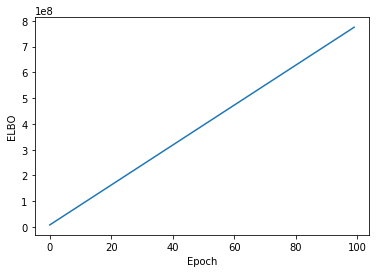

In [9]:
fig, ax = plt.subplots()
ax.plot(model.get_stats_by_epoch("ELBO"))
ax.set_xlabel("Epoch")
ax.set_ylabel("ELBO")
None

In [10]:
topic_vectors = model.get_expected_topic_vectors()

In [11]:
topic_vectors.shape

(31, 42756)

In [12]:
variance = topic_vectors.var(axis=0)
print(variance.shape)
np.linalg.norm(variance)

(42756,)


3.6595792214602578e-05

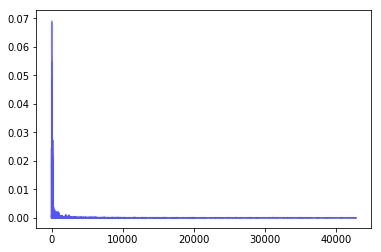

In [13]:
for i in range(10):
    plt.plot(topic_vectors[i,:], color='b', alpha=0.1);

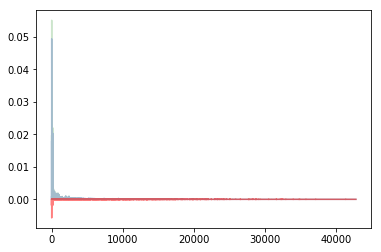

In [14]:
plt.plot(topic_vectors[0,:], color='b', alpha=0.2)
plt.plot(topic_vectors[1,:], color='g', alpha=0.2)
plt.plot(topic_vectors[0,:] - topic_vectors[1,:], color='r', alpha=0.5)
None